In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import collections

#12. Apply QDA on Data 1 and Data 2.
(a) Plot the decision boundary.

(b) Assess the performance of the model.

(c) Plot ROC curve.

(d) Plot multivariate Gaussian density function corresponding to the positive & negative classes and their contours of Data 1.

(e) Report the values of the parameters.

In [2]:
datafile1 = pd.read_csv("DM_Asgmt_04/data1.csv",header=None)
datafile1

,0,1,2
0,14,42,1
1,29,40,1
2,22,22,1
3,11,20,1
4,10,35,1
...,...,...,...
195,46,30,-1
196,32,17,-1
197,4,33,-1
198,12,4,-1


In [3]:
datafile1[2] = datafile1[2].replace(-1,0)

In [4]:
dataf1 = np.array(datafile1)
np.random.shuffle(dataf1)
training = dataf1[:int(0.6*len(dataf1))]
x = dict(collections.Counter(training[:,-1]))
print(x)

{0: 63, 1: 57}


In [5]:
pi = np.zeros(len(x))
for i in range(len(pi)):
  pi[i] = x[i]
pi = pi / sum(x.values())
print(pi)

[0.525 0.475]


In [6]:
u = np.zeros((len(x),len(training[0][:-1])))
for i in range(len(training)):
  y = training[i][-1]
  X = training[i][:-1]
  u[y] += X/x[y]
print(u)

[[26.11111111 16.50793651]
 [23.70175439 32.96491228]]


In [7]:
E = np.zeros(  ( len(x), len(u[0]), len(u[0]) )  )
for i in range(len(training)):
  y = training[i][-1]
  X = training[i][:-1]
  E[y] += ((X-u[y]).reshape(-1,1) * (X-u[y])) / x[y]
print(E)

[[[261.84479718 -78.13580247]
  [-78.13580247 155.10707987]]

 [[154.03385657  76.77900893]
  [ 76.77900893 133.15666359]]]


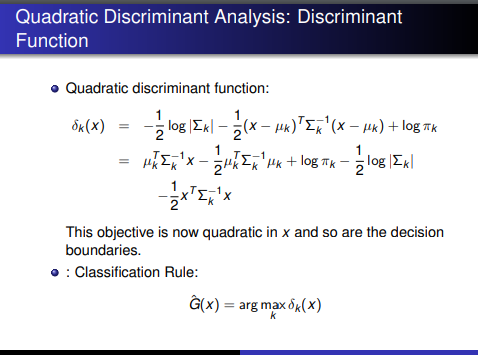



```
let delta[x] = a*X + b - 0.5 * X' * c * X 
from above formula

```





In [8]:
A = np.zeros(
      (len(x) , 1 , len(u[0]) )
)

b = np.zeros(len(x))
c = np.zeros(
      (len(x) , len(u[0]) , len(u[0]) )
)

for i in range(len(A)):
  c[i] = np.linalg.inv(E[i])
  A[i] = np.matmul( u[i] , c[i] ) 
  b[i] = -0.5 * np.matmul( np.matmul(u[i],c[i]) , u[i].reshape(-1,1)) + np.log(pi[i]) - 0.5*np.log(np.linalg.det(E[i]))

In [9]:
cm = np.zeros((len(x),len(x)))
testing = dataf1[int(0.6*len(dataf1)):]
roc_data = [[],[]]
for i in range(len(testing)):
  y = testing[i][-1]
  X = testing[i][:-1]
  delta = np.zeros(len(x))
  for i in range(len(delta)):
    delta[i] = np.matmul(A[i],X.reshape(-1,1)) + b[i] - 0.5*np.matmul( np.matmul(X,c[i]), X.reshape(-1,1))
  roc_data[0].append(y)
  roc_data[1].append(delta[1])
  cls = np.argmax(delta)
  cm[cls][y] += 1
print(cm)

[[35.  7.]
 [ 2. 36.]]


In [10]:
precision = cm[0][0] / sum(cm[0])
recall = cm[0][0] / sum(cm[:,0])
fscore = 2*precision*recall / (precision+recall)

print("Precision :",precision)
print("Recall :",recall)
print("fscore :",fscore)

Precision : 0.8333333333333334
Recall : 0.9459459459459459
fscore : 0.8860759493670887


Desicion boundary 


```
delta[0] = delta[1]

A[0]X + b[0] -0.5* X' * c[0] * X = A[1]X + b[1] -0.5* X' * c[1] * X

(A[0]-A[1])X + (b[0]-b[1]) -0.5 * X' (c[0]-c[1]) X = 0

pX + q -0.5* X'* r *X = 0

```




In [11]:
p = (A[0]-A[1])[0]
q = b[0]-b[1]
r = c[0] - c[1]
x1 = np.linspace(0,50,100)
plot_data = [[],[]]
for i in range(len(x1)):
  d = -0.5*r[1][1]
  e = p[1] - x1[i]*r[1][0]
  f = p[0]*x1[i] + q -0.5*(x1[i]**2)*r[0][0]
  [x21,x22] = np.roots([d,e,f])
  # plot_data[0].append(x1[i])
  # plot_data[1].append(x21)
  plot_data[0].append(x1[i])
  plot_data[1].append(x22)


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


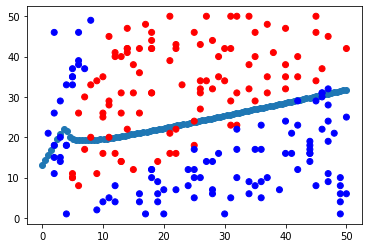

In [12]:
cc = ["r" if i[2] == 1 else "b" for i in np.array(datafile1)]
plt.scatter(plot_data[0],plot_data[1])
plt.scatter(np.array(datafile1[0]),np.array(datafile1[1]),c=cc)
plt.show()

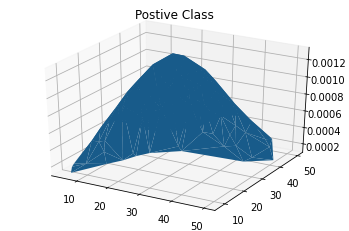

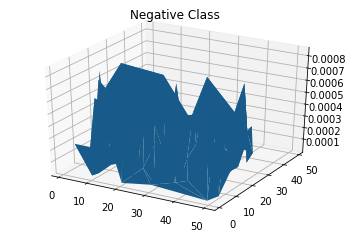

In [13]:
from scipy.stats import multivariate_normal
import seaborn as sns
x = [i[:-1] for i in dataf1 if i[-1] == 1 ]
y = [i[:-1] for i in dataf1 if i[-1] == 0 ]


ax = plt.figure().gca(projection="3d")


X1,X2 = ([i[0] for i in x],[i[1] for i in x])
X3 = multivariate_normal.pdf(x,u[1],E[1])

ax.plot_trisurf(X1,X2,X3)
ax.set_title("Postive Class")



plt.show()

ax = plt.figure().gca(projection="3d")

Y1,Y2 = ([i[0] for i in y],[i[1] for i in y])
Y3 = multivariate_normal.pdf(x,u[0],E[0])

ax.plot_trisurf(Y1,Y2,Y3)
ax.set_title("Negative Class")


plt.show()

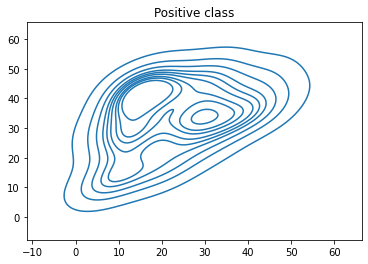

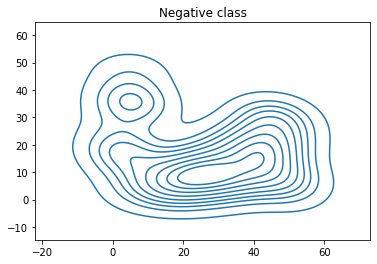

In [14]:

ax = plt.figure().gca()
sns.kdeplot(x=X1,y=X2)
ax.set_title("Positive class")
plt.show()
ax = plt.figure().gca()
sns.kdeplot(x=Y1,y=Y2)
ax.set_title("Negative class")
plt.show()


**Data 2**

In [15]:
datafile2 = pd.read_csv("DM_Asgmt_04/data2.csv",header=None)
datafile2

,0,1,2
0,1.8081,-9.03440,1
1,2.3231,-8.87900,1
2,5.6168,2.07560,1
3,5.6064,-2.66200,1
4,3.2201,-4.93770,1
...,...,...,...
195,8.3921,-2.05130,0
196,7.0783,-4.20580,0
197,9.4625,-0.25960,0
198,6.3951,-0.31008,0


In [16]:
dataf2 = np.array(datafile2)
np.random.shuffle(dataf2)
training = dataf2[:int(0.6*len(dataf2))]
x = dict(collections.Counter(training[:,-1]))
print(x)

{0.0: 58, 1.0: 62}


In [17]:
pi = np.zeros(len(x))
for i in range(len(pi)):
  pi[i] = x[i]
pi = pi / sum(x.values())
print(pi)

[0.48333333 0.51666667]


In [18]:
u = np.zeros((len(x),len(training[0][:-1])))
for i in range(len(training)):
  y = int(training[i][-1])
  X = training[i][:-1]
  u[y] += X/x[y]
print(u)

[[ 7.99722586 -1.356405  ]
 [ 0.84544659 -4.6314456 ]]


In [19]:
E = np.zeros(  ( len(x), len(u[0]), len(u[0]) )  )
for i in range(len(training)):
  y = int(training[i][-1])
  X = training[i][:-1]
  E[y] += ((X-u[y]).reshape(-1,1) * (X-u[y])) / x[y]
print(E)

[[[ 6.2253754   4.21457473]
  [ 4.21457473  5.76684325]]

 [[16.23995987  8.7685105 ]
  [ 8.7685105  11.49407745]]]


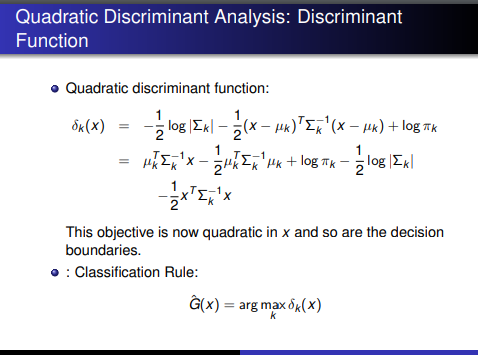



```
let delta[x] = a*X + b - 0.5 * X' * c * X 
from above formula

```





In [20]:
A = np.zeros(
      (len(x) , 1 , len(u[0]) )
)

b = np.zeros(len(x))
c = np.zeros(
      (len(x) , len(u[0]) , len(u[0]) )
)

for i in range(len(A)):
  c[i] = np.linalg.inv(E[i])
  A[i] = np.matmul( u[i] , c[i] ) 
  b[i] = -0.5 * np.matmul( np.matmul(u[i],c[i]) , u[i].reshape(-1,1)) + np.log(pi[i]) - 0.5*np.log(np.linalg.det(E[i]))

In [21]:
cm = np.zeros((len(x),len(x)))
testing = dataf2[int(0.6*len(dataf1)):]
roc_data = [[],[]]
for i in range(len(testing)):
  y = int(testing[i][-1])
  X = testing[i][:-1]
  delta = np.zeros(len(x))
  for i in range(len(delta)):
    delta[i] = np.matmul(A[i],X.reshape(-1,1)) + b[i] - 0.5*np.matmul( np.matmul(X,c[i]), X.reshape(-1,1))
  roc_data[0].append(y)
  roc_data[1].append(delta[1])
  cls = np.argmax(delta)
  cm[cls][y] += 1
print(cm)

[[39.  4.]
 [ 3. 34.]]


In [22]:
precision = cm[0][0] / sum(cm[0])
recall = cm[0][0] / sum(cm[:,0])
fscore = 2*precision*recall / (precision+recall)

print("Precision :",precision)
print("Recall :",recall)
print("fscore :",fscore)

Precision : 0.9069767441860465
Recall : 0.9285714285714286
fscore : 0.9176470588235294


Desicion boundary 


```
delta[0] = delta[1]

A[0]X + b[0] -0.5* X' * c[0] * X = A[1]X + b[1] -0.5* X' * c[1] * X

(A[0]-A[1])X + (b[0]-b[1]) -0.5 * X' (c[0]-c[1]) X = 0

pX + q -0.5* X'* r *X = 0

```




In [23]:
p = (A[0]-A[1])[0]
q = b[0]-b[1]
r = c[0] - c[1]
x1 = np.linspace(-10,15,100)
plot_data = [[],[]]
for i in range(len(x1)):
  d = -0.5*r[1][1]
  e = p[1] - x1[i]*r[1][0]
  f = p[0]*x1[i] + q -0.5*(x1[i]**2)*r[0][0]
  [x21,x22] = np.roots([d,e,f])
  plot_data[0].append(x1[i])
  plot_data[1].append(x21)
  plot_data[0].append(x1[i])
  plot_data[1].append(x22)


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


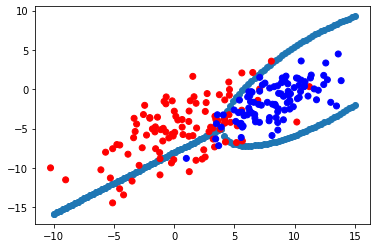

In [24]:
cc = ["r" if i[2] == 1 else "b" for i in np.array(datafile2)]
plt.scatter(plot_data[0],plot_data[1])
plt.scatter(np.array(datafile2[0]),np.array(datafile2[1]),c=cc)
plt.show()

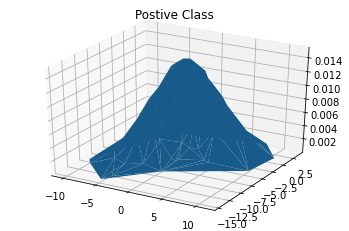

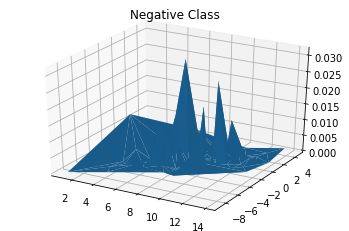

In [25]:
from scipy.stats import multivariate_normal
import seaborn as sns
x = [i[:-1] for i in dataf2 if i[-1] == 1 ]
y = [i[:-1] for i in dataf2 if i[-1] == 0 ]


ax = plt.figure().gca(projection="3d")


X1,X2 = ([i[0] for i in x],[i[1] for i in x])
X3 = multivariate_normal.pdf(x,u[1],E[1])

ax.plot_trisurf(X1,X2,X3)
ax.set_title("Postive Class")



plt.show()

ax = plt.figure().gca(projection="3d")

Y1,Y2 = ([i[0] for i in y],[i[1] for i in y])
Y3 = multivariate_normal.pdf(x,u[0],E[0])

ax.plot_trisurf(Y1,Y2,Y3)
ax.set_title("Negative Class")


plt.show()

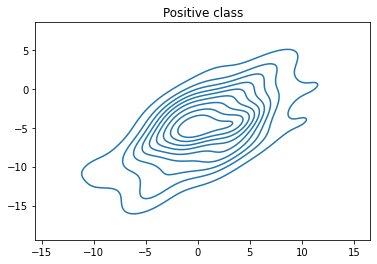

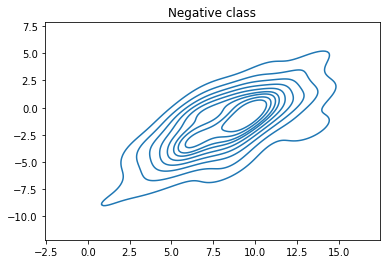

In [26]:

ax = plt.figure().gca()
sns.kdeplot(x=X1,y=X2)
ax.set_title("Positive class")
plt.show()
ax = plt.figure().gca()
sns.kdeplot(x=Y1,y=Y2)
ax.set_title("Negative class")
plt.show()


# 13. Apply multiclass QDA on Data 3.

(a) Plot the decision boundary between classes.

(b) Report the values of the parameters.

(c) Assess the performance of the model.

In [27]:
datafile3 = pd.read_csv("DM_Asgmt_04/data3.csv",header=None)
datafile3

,0,1,2,3
0,-9.80320,-7.75440,1.47200,1
1,-3.02640,-4.52130,2.19240,1
2,-1.48330,-6.62440,3.13420,1
3,-4.96900,-0.78348,-3.51890,1
4,-6.12240,-5.09510,0.99638,1
...,...,...,...,...
295,2.19130,-1.48810,-3.92220,3
296,-4.70710,1.70130,-1.12300,3
297,-3.52900,-5.19190,-2.59620,3
298,-0.98873,1.48270,-0.58205,3


In [28]:
dataf3 = np.array(datafile3)
np.random.shuffle(dataf3)
training = dataf3[:int(0.6*len(dataf3))]
x = dict(collections.Counter(training[:,-1]))
print(x)

{2.0: 62, 1.0: 60, 3.0: 58}


In [29]:
pi = np.zeros(len(x)+1)
for i in range(1,len(pi)):
  pi[i] = x[i]
pi = pi / sum(x.values())
print(pi)

[0.         0.33333333 0.34444444 0.32222222]


In [30]:
u = np.zeros((len(x)+1,len(training[0][:-1])))
for i in range(len(training)):
  y = int(training[i][-1])
  X = training[i][:-1]
  u[y] += X/x[y]
print(u)

[[ 0.          0.          0.        ]
 [-3.57170983 -2.99518717  3.21146583]
 [ 4.65226929  4.44763468 -3.03149268]
 [ 0.30070241  0.12779829 -0.42858693]]


In [31]:
E = np.zeros(  ( len(x)+1, len(u[0]), len(u[0]) )  )
for i in range(len(training)):
  y = int(training[i][-1])
  X = training[i][:-1]
  E[y] += ((X-u[y]).reshape(-1,1) * (X-u[y])) / x[y]
print(E)

[[[ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]]

 [[13.33261117  8.23572951  4.46203179]
  [ 8.23572951 14.24234839  1.46309925]
  [ 4.46203179  1.46309925  9.45442015]]

 [[ 7.99491594 -0.90938492  0.45112891]
  [-0.90938492  5.39133192 -0.32728485]
  [ 0.45112891 -0.32728485  3.36083529]]

 [[ 8.06705888 -0.12567803  1.1173524 ]
  [-0.12567803  7.58556528  0.59138189]
  [ 1.1173524   0.59138189  5.6303146 ]]]


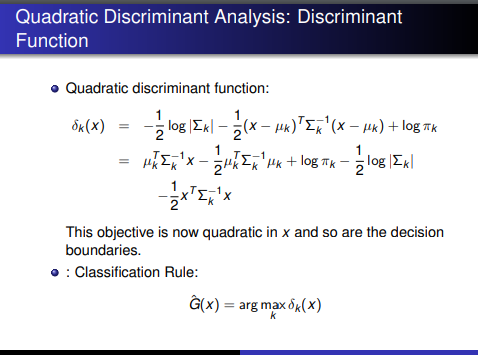



```
let delta[x] = a*X + b - 0.5 * X' * c * X 
from above formula

```





In [32]:
A = np.zeros(
      (len(x)+1 , 1 , len(u[0]) )
)

b = np.zeros(len(x)+1)
c = np.zeros(
      (len(x)+1 , len(u[0]) , len(u[0]) )
)

for i in range(1,len(A)):
  c[i] = np.linalg.inv(E[i])
  A[i] = np.matmul( u[i] , c[i] ) 
  b[i] = -0.5 * np.matmul( np.matmul(u[i],c[i]) , u[i].reshape(-1,1)) + np.log(pi[i]) - 0.5*np.log(np.linalg.det(E[i]))

In [33]:
cm = np.zeros((len(x)+1,len(x)+1))
testing = dataf3[int(0.6*len(dataf3)):]
roc_data = [[],[]]
for i in range(len(testing)):
  y = int(testing[i][-1])
  X = testing[i][:-1]
  delta = np.zeros(len(x)+1)
  for i in range(1,len(delta)):
    delta[i] = np.matmul(A[i],X.reshape(-1,1)) + b[i] - 0.5*np.matmul( np.matmul(X,c[i]), X.reshape(-1,1))
  roc_data[0].append(y)
  roc_data[1].append(delta[1])
  cls = np.argmax(delta[1:]) + 1
  cm[cls][y] += 1
print(cm)

[[ 0.  0.  0.  0.]
 [ 0. 38.  0.  8.]
 [ 0.  0. 31.  2.]
 [ 0.  2.  7. 32.]]


In [34]:

precision = np.zeros(len(cm))
recall = np.zeros(len(cm))
f_score = np.zeros(len(cm))

for i in range(1,len(precision)):
  precision[i] = cm[i][i]/(sum(cm[i]))
  recall[i] = cm[i][i]/(sum(cm[:,i]))
  f_score[i] = (2*precision[i]*recall[i])/(precision[i]+recall[i])


fscore = {k:v for k,v in enumerate(f_score)}
del(fscore[0])
print("F Scores of each class are")
for k,v in fscore.items():
  print(f"Class {k} : F-score {v}")



F Scores of each class are
Class 1 : F-score 0.8837209302325583
Class 2 : F-score 0.8732394366197183
Class 3 : F-score 0.7710843373493976


Desicion boundary 


```
delta[0] = delta[1]

A[0]X + b[0] -0.5* X' * c[0] * X = A[1]X + b[1] -0.5* X' * c[1] * X

(A[0]-A[1])X + (b[0]-b[1]) -0.5 * X' (c[0]-c[1]) X = 0

pX + q -0.5* X'* r *X = 0

```




In [35]:
c[2]-c[1]

array([[-0.01127508,  0.09585143,  0.039039  ],
       [ 0.09585143,  0.07813679, -0.00244425],
       [ 0.039039  , -0.00244425,  0.17255592]])

In [36]:
p = (A[2]-A[1])[0]
q = b[2]-b[1]
r = c[2] - c[1]
x1 = np.linspace(-10,15,5000)
np.random.shuffle(x1)
x2 = np.linspace(-10,15,5000)
np.random.shuffle(x2)
plot_data21 = [[],[],[]]
for i in range(len(x1)):
  d = -0.5*r[2][2]
  e = p[2] - x1[i]*r[2][0] - x2[i]*r[1][2]
  f = p[0]*x1[i] + p[1]*x2[i] + q -0.5*(x1[i]**2)*r[0][0] -x1[i]*x2[i]*r[0][1] -0.5*(x2[i]**2)*r[1][1]
  x3 = np.roots([d,e,f])
  if all(np.isreal(x3)):
    # plot_data21[0].append(x1[i])
    # plot_data21[1].append(x2[i])
    # plot_data21[2].append(x3[0])
    plot_data21[0].append(x1[i])
    plot_data21[1].append(x2[i])
    plot_data21[2].append(x3[1])

In [37]:
p = (A[3]-A[1])[0]
q = b[3]-b[1]
r = c[3] - c[1]
x1 = np.linspace(-10,15,5000)
np.random.shuffle(x1)
x2 = np.linspace(-10,15,5000)
np.random.shuffle(x2)
plot_data31 = [[],[],[]]
for i in range(len(x1)):
  d = -0.5*r[2][2]
  e = p[2] - x1[i]*r[2][0] - x2[i]*r[1][2]
  f = p[0]*x1[i] + p[1]*x2[i] + q -0.5*(x1[i]**2)*r[0][0] -x1[i]*x2[i]*r[0][1] -0.5*(x2[i]**2)*r[1][1]
  x3 = np.roots([d,e,f])
  if all(np.isreal(x3)):
    # plot_data31[0].append(x1[i])
    # plot_data31[1].append(x2[i])
    # plot_data31[2].append(x3[0])
    plot_data31[0].append(x1[i])
    plot_data31[1].append(x2[i])
    plot_data31[2].append(x3[1])

In [38]:
p = (A[3]-A[2])[0]
q = b[3]-b[2]
r = c[3] - c[2]
x1 = np.linspace(-10,15,5000)
np.random.shuffle(x1)
x2 = np.linspace(-10,15,5000)
np.random.shuffle(x2)
plot_data32 = [[],[],[]]
for i in range(len(x1)):
  d = -0.5*r[2][2]
  e = p[2] - x1[i]*r[2][0] - x2[i]*r[1][2]
  f = p[0]*x1[i] + p[1]*x2[i] + q -0.5*(x1[i]**2)*r[0][0] -x1[i]*x2[i]*r[0][1] -0.5*(x2[i]**2)*r[1][1]
  x3 = np.roots([d,e,f])
  if all(np.isreal(x3)):
    # plot_data32[0].append(x1[i])
    # plot_data32[1].append(x2[i])
    # plot_data32[2].append(x3[0])
    plot_data32[0].append(x1[i])
    plot_data32[1].append(x2[i])
    plot_data32[2].append(x3[1])

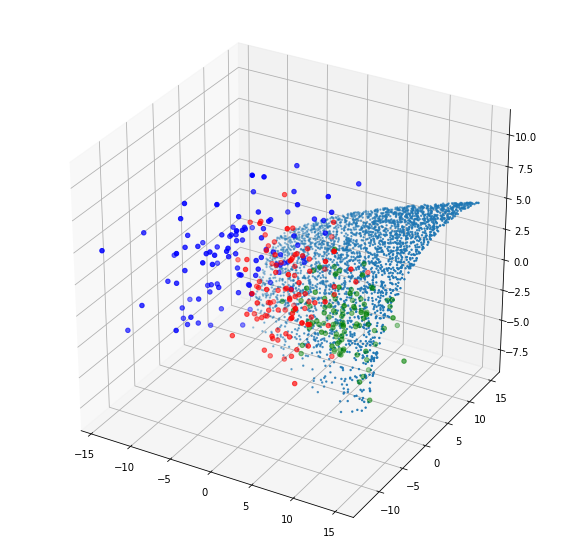

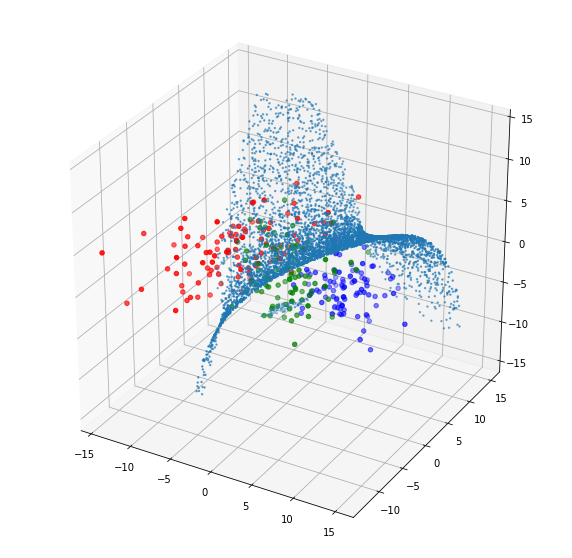

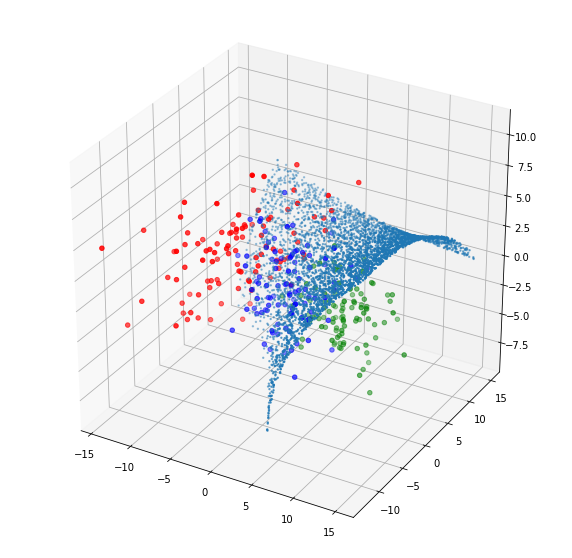

In [39]:
cc = []
for i in np.array(datafile3):
  if i[3] == 3:
    cc.append("r") 
  elif i[3] == 2:
    cc.append("g")
  else :
    cc.append("b")
ax = plt.figure(figsize=[10,10]).gca(projection="3d")

ax.scatter3D(plot_data32[0],plot_data32[1],plot_data32[2],s=2)
ax.scatter3D(np.array(datafile3[0]),np.array(datafile3[1]),np.array(datafile3[2]),c=cc)
# ax.view_init(0,0)
plt.show()

cc = []
for i in np.array(datafile3):
  if i[3] == 1:
    cc.append("r") 
  elif i[3] == 3:
    cc.append("g")
  else :
    cc.append("b")
ax = plt.figure(figsize=[10,10]).gca(projection="3d")
ax.scatter3D(plot_data31[0],plot_data31[1],plot_data31[2],s=2)
ax.scatter3D(np.array(datafile3[0]),np.array(datafile3[1]),np.array(datafile3[2]),c=cc)
# ax.view_init(30,30)
plt.show()

cc = []
for i in np.array(datafile3):
  if i[3] == 1:
    cc.append("r") 
  elif i[3] == 2:
    cc.append("g")
  else :
    cc.append("b")
ax = plt.figure(figsize=[10,10]).gca(projection="3d")
ax.scatter3D(plot_data21[0],plot_data21[1],plot_data21[2],s=2)
ax.scatter3D(np.array(datafile3[0]),np.array(datafile3[1]),np.array(datafile3[2]),c=cc)
# ax.view_init(30,30)
plt.show()

# 14. Analyze Data 4 and Data 5 using Naive Bayes.

(a) Describe the procedure you used for the analysis.

(b) Access the performance of the model.

In [40]:
datafile4 = pd.read_csv("DM_Asgmt_04/data4.csv",header=None)
datafile4

,0,1,2,3
0,1,1,2,1
1,1,1,5,1
2,1,1,6,1
3,1,2,1,-1
4,1,2,5,1
...,...,...,...,...
166,8,6,7,1
167,8,7,1,-1
168,8,7,2,-1
169,8,8,1,-1


In [41]:
datafile4[3] = datafile4[3].replace(-1,0)

In [42]:
dataf4 = np.array(datafile4)
np.random.shuffle(dataf4)
training = dataf4[:int(0.7*len(dataf4))]
x = dict(collections.Counter(training[:,3]))
print(x)

{1: 67, 0: 52}


In [43]:
pi = np.zeros(len(x))
for i in range(len(pi)):
  pi[i] = x[i]
pi = pi / sum(x.values())
print(pi)

[0.43697479 0.56302521]


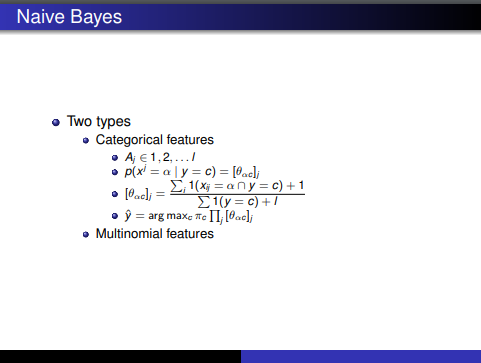

In [44]:
testing = dataf4[int(0.7*len(dataf4)) : ]
cm = np.zeros((len(x),len(x)))
for i in range(len(testing)):
  X = testing[i][:-1]
  y = testing[i][-1]
  th1 = np.ones(len(X)+1)
  th0 = np.ones(len(X)+1)
  for j in range(len(X)):
    num1 = 0
    num0 = 0
    for k in range(len(training)):
      if training[k][j] == X[j] and training[k][-1] == 1:
        num1 += 1
      elif training[k][j] == X[j] and training[k][-1] == 0:
        num0 += 1
    th1[j] = (num1+1)/(x[1]+len(X))
    th0[j] = (num0+1)/(x[0]+len(X))
  p1 = pi[1]*np.prod(th1)
  p0 = pi[0]*np.prod(th0)
  if p1 >= p0 :
    cls = 1
  else:
    cls = 0
  cm[cls][y] += 1
print(cm)

[[21.  2.]
 [ 0. 29.]]


In [45]:
precision = cm[0][0] / sum(cm[0])
recall = cm[0][0] / sum(cm[:,0])
fscore = (2*precision*recall)/(precision+recall)

print("Precision",precision)
print("Recall",recall)
print("Fscore",fscore)

Precision 0.9130434782608695
Recall 1.0
Fscore 0.9545454545454545


**Data 5**

In [46]:
datafile5 = pd.read_csv("DM_Asgmt_04/data5.csv",header=None)
datafile5

,0,1,2,3
0,-49.841,14.45100,-42.9420,-1
1,-48.796,-45.80400,9.9935,1
2,-48.563,-22.64300,-32.5720,-1
3,-48.427,37.32300,-29.4660,-1
4,-48.310,3.57210,34.9960,-1
...,...,...,...,...
213,48.367,-9.47040,45.5650,1
214,48.493,16.06300,-19.4610,1
215,48.839,-22.50400,-38.0350,1
216,49.255,-24.87400,-24.1980,1


In [47]:
datafile5[3] = datafile5[3].replace(-1,0)

In [48]:
dataf5 = np.array(datafile5)
np.random.shuffle(dataf5)
training = dataf5[:int(0.7*len(dataf5))]
x = dict(collections.Counter(training[:,3]))
print(x)

{0.0: 82, 1.0: 70}


In [49]:
pi = np.zeros(len(x))
for i in range(len(pi)):
  pi[i] = x[i]
pi = pi / sum(x.values())
print(pi)

[0.53947368 0.46052632]


In [50]:
u = np.zeros((len(x),len(training[0])-1))
for i in range(len(training)):
  if training[i][-1] == 1:
    u[1] += training[i][:-1] / x[1]
  else:
    u[0] += training[i][:-1] / x[0]
u

array([[ -9.47477122,  23.12792824,  -7.93813659],
       [ 10.26892786, -23.07166371,   4.03134669]])

In [51]:
d1 = np.array([ i[:-1]  for i in training if i[-1]==1])
d0 = np.array([ i[:-1]  for i in training if i[-1]==0])
sigma = np.zeros((len(x),len(training[0])-1))

sigma[0][0] = np.std(d0[:,0])
sigma[0][1] = np.std(d0[:,1])
sigma[0][2] = np.std(d0[:,2])

sigma[1][0] = np.std(d1[:,0])
sigma[1][1] = np.std(d1[:,1])
sigma[1][2] = np.std(d1[:,2])

print(sigma)

[[26.3305157  17.43857722 30.38941579]
 [25.4020149  18.84614242 27.67987582]]


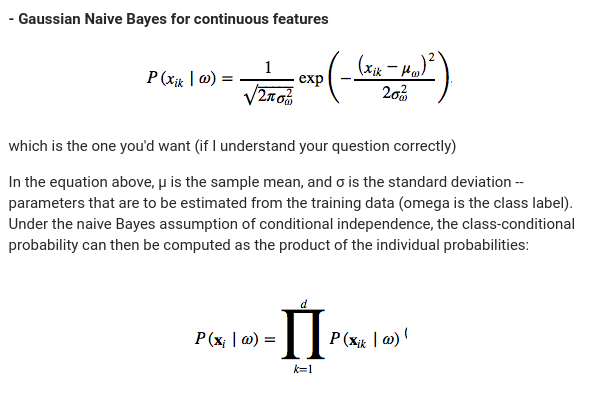

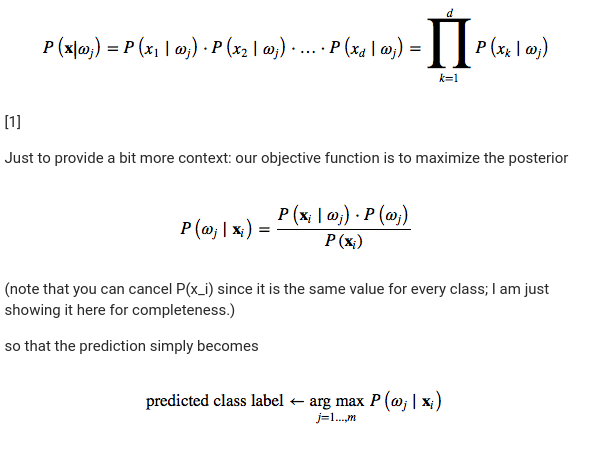

In [52]:
testing = dataf5[int(0.7*len(dataf5)) : ]
cm = np.zeros((len(x),len(x)))
for i in range(len(testing)):
  X = testing[i][:-1]
  y = int(testing[i][-1])

  Px0 = np.exp(
      -np.power(X-u[0],2) / (2*np.power(sigma[0],2))
  ) / (np.sqrt(2*np.pi*np.power(sigma[0],2))) 

  Px1 = np.exp(
      -np.power(X-u[1],2) / (2*np.power(sigma[1],2))
  ) / (np.sqrt(2*np.pi*np.power(sigma[1],2))) 

  p1 = pi[1]*np.prod(Px1)
  p0 = pi[0]*np.prod(Px0)
  
  if p1 >= p0 :
    cls = 1
  else:
    cls = 0
  cm[cls][y] += 1
print(cm)

[[21.  1.]
 [ 6. 38.]]


In [53]:
precision = cm[0][0] / sum(cm[0])
recall = cm[0][0] / sum(cm[:,0])
fscore = (2*precision*recall)/(precision+recall)

print("Precision",precision)
print("Recall",recall)
print("Fscore",fscore)

Precision 0.9545454545454546
Recall 0.7777777777777778
Fscore 0.8571428571428572


# 15. Apply Multinomial Naive Bayes on Data 6.

(a) Plot the decision boundary.

(b) Report the parameters of the model

(c) Report the performance measure used and their values.


In [54]:
datafile6 = pd.read_csv("DM_Asgmt_04/data6.csv",header=None)
datafile6

,0,1,2,3
0,12,10,28,0
1,13,10,27,0
2,14,8,28,0
3,14,12,24,0
4,14,13,23,0
...,...,...,...,...
203,20,19,11,1
204,20,21,9,1
205,21,19,10,1
206,21,20,9,1


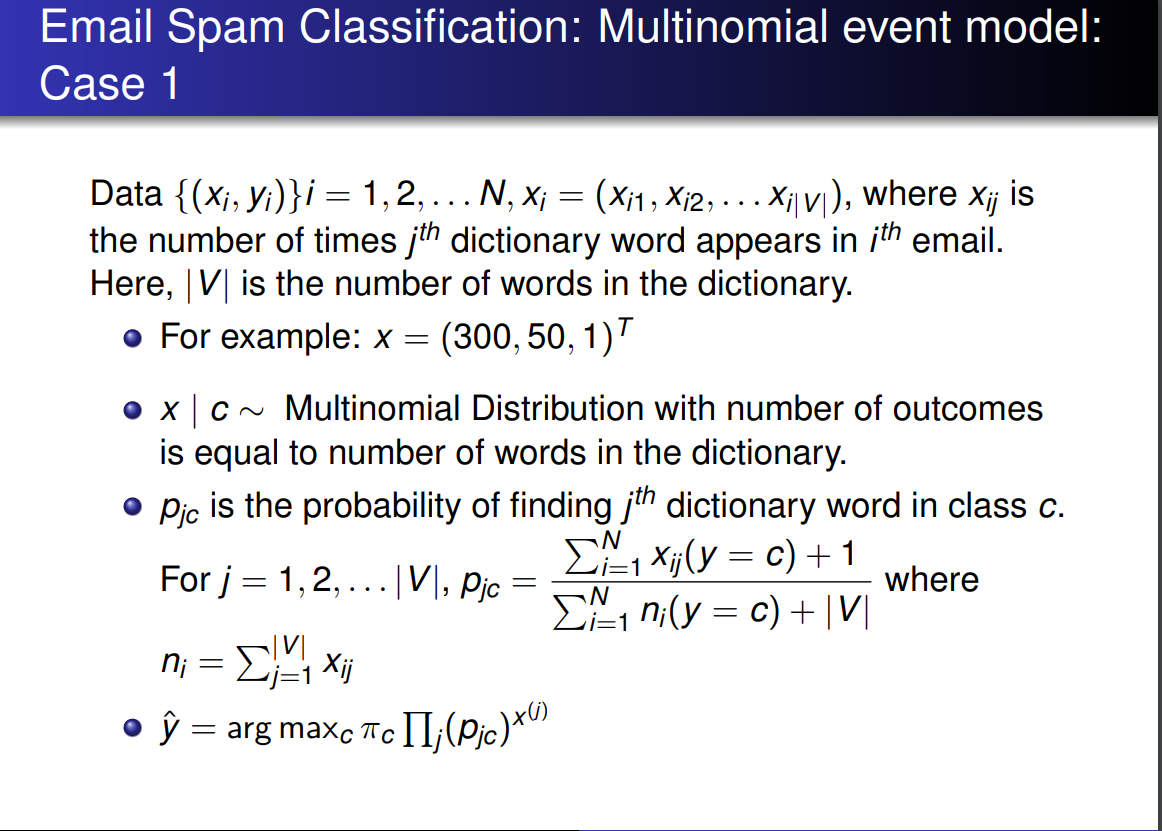


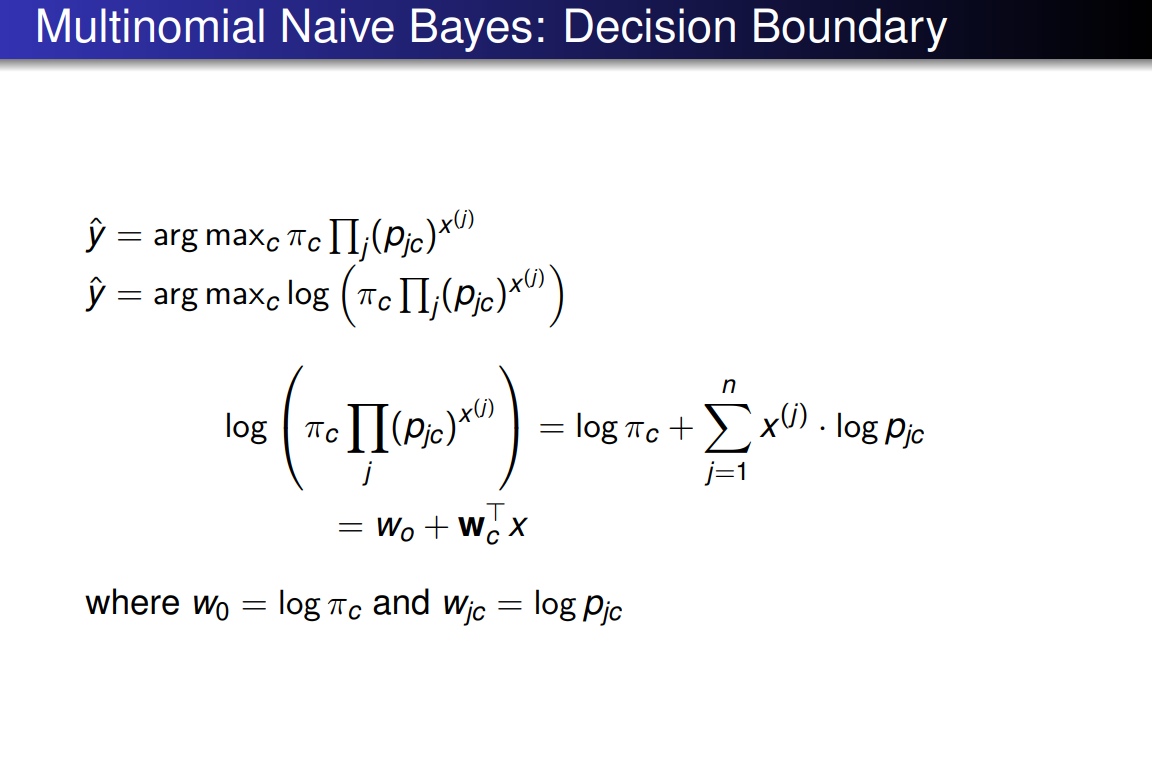

In [55]:
dataf6 = np.array(datafile6)
np.random.shuffle(dataf6)
training = dataf6[:int(0.7*len(dataf6))]
x = dict(collections.Counter(training[:,-1]))
print(x)

{1: 82, 0: 63}


In [56]:
pi = np.zeros(len(x))
for i in range(len(pi)):
  pi[i] = x[i]
pi = pi / sum(x.values())
print(pi)

[0.43448276 0.56551724]


In [57]:
X = training[0][:-1]
p0 = np.ones(len(X))
p1 = np.ones(len(X))
num1 = np.ones(len(X))
den1 = len(X)
num0 = np.ones(len(X))
den0 = len(X)
for j in range(len(training)):
  for k in range(len(training[0])-1):
    if training[j][-1] == 1:
      num1[k] += training[j][k]
      den1 += sum(training[j][:-1])
    elif training[j][-1] == 0:
      num0[k] += training[j][k]
      den0 += sum(training[j][:-1])
  
p1 = num1/den1
p0 = num0/den0 

In [58]:
testing = dataf6[int(0.7*len(dataf6)) : ]
cm = np.zeros((len(x),len(x)))
for i in range(len(testing)):
  X = testing[i][:-1]
  y = int(testing[i][-1])
  P1 = np.log(pi[1]) + np.inner(X,np.log(p1))
  P0 = np.log(pi[0]) + np.inner(X,np.log(p0))
  
  if P1 >= P0 :
    cls = 1
  else:
    cls = 0
  cm[cls][y] += 1
print(cm)

[[25.  0.]
 [ 0. 38.]]


In [59]:
precision = cm[0][0] / sum(cm[0])
recall = cm[0][0] / sum(cm[:,0])
fscore = (2*precision*recall)/(precision+recall)

print("Precision",precision)
print("Recall",recall)
print("Fscore",fscore)

Precision 1.0
Recall 1.0
Fscore 1.0


desicion boundary class 1

log(pi[1]) + x1*log(p1[0]) + x2*log(p1[1]) + x3*log(p1[2]) = 0

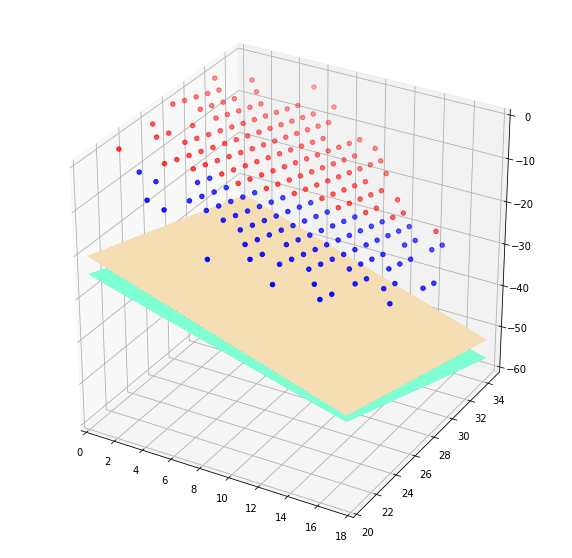

In [60]:
cc = ["r" if i[3] == 1 else "b" for i in np.array(datafile6)]

x1 = np.linspace(0,18,100)
np.random.shuffle(x1)
x2 = np.linspace(20,35,100)
np.random.shuffle(x2)
X1,X2 = np.meshgrid(x1,x2)

X3 = ( np.log(pi[1]) + X1*np.log(p1[0]) + X2*np.log(p1[1])) / (-np.log(p1[2]))
X4 = ( np.log(pi[0]) + X1*np.log(p0[0]) + X2*np.log(p0[1])) / (-np.log(p0[2]))

ax = plt.figure(figsize=[10,10]).gca(projection="3d")

ax.plot_surface(X1,X2,X3,color = "wheat",shade=False)
ax.scatter3D(datafile6[0],datafile6[1],datafile6[2],c=cc)
ax.plot_surface(X1,X2,X4,color = "aquamarine",shade=False)
ax.set_xlim([0,18])
ax.set_ylim([20,35])
ax.set_zlim([-60,0])
plt.show()

# 16. Apply QDA and Naive Bayes on Ionosphere data set.

(a) Apply k fold and hold out cross validation techniques.

(b) Report the preprocessing techniques if any.

(c) Report the value of the performance measures used.

(d) Compare the performance of the algorithms by using statistical measures (t test)

In [61]:
isdata = pd.read_csv("DM_Asgmt_04/ionosphere.csv",header=None)
isdata

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,0.89391,0.13130,0.81197,0.06723,0.79307,-0.08929,1.00000,-0.02101,0.96639,0.06618,0.87605,0.01155,0.77521,0.06618,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,0.96510,0.03281,0.94171,0.07330,0.94625,-0.01326,0.97173,0.00140,0.94834,0.06038,0.92670,0.08412,0.93124,0.10087,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,0.94124,0.01766,0.92595,0.04688,0.93954,-0.01461,0.94837,0.02004,0.93784,0.01393,0.91406,0.07677,0.89470,0.06148,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,0.89724,-0.03315,0.89061,-0.01436,0.90608,-0.04530,0.91381,-0.00884,0.80773,-0.12928,0.88729,0.01215,0.92155,-0.02320,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


In [62]:
isdata = isdata.drop(columns=isdata.columns[(isdata==0).all()])
isdata = isdata.drop(columns=[0])

In [63]:
isdata[34] = isdata[34].replace('g',1)
isdata[34] = isdata[34].replace('b',0)

In [64]:
isdata

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,1
1,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0
2,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1
3,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,0
4,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,0.89391,0.13130,0.81197,0.06723,0.79307,-0.08929,1.00000,-0.02101,0.96639,0.06618,0.87605,0.01155,0.77521,0.06618,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,1
347,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,0.96510,0.03281,0.94171,0.07330,0.94625,-0.01326,0.97173,0.00140,0.94834,0.06038,0.92670,0.08412,0.93124,0.10087,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,1
348,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,0.94124,0.01766,0.92595,0.04688,0.93954,-0.01461,0.94837,0.02004,0.93784,0.01393,0.91406,0.07677,0.89470,0.06148,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,1
349,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,0.89724,-0.03315,0.89061,-0.01436,0.90608,-0.04530,0.91381,-0.00884,0.80773,-0.12928,0.88729,0.01215,0.92155,-0.02320,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,1


In [65]:
# Using Hold out ( Random sampling)
dataf7 = np.array(isdata)
q_fscore_rs = []
q_accuracy_rs = []
for o in range(10):
  np.random.shuffle(dataf7)
  training = dataf7[:int(0.66*len(dataf7))]
  testing = dataf7[int(0.66*len(dataf7)):]
  x = dict(collections.Counter(training[:,-1]))
  pi = np.zeros(len(x))
  for i in range(len(pi)):
    pi[i] = x[i]
  pi = pi / sum(x.values())
  u = np.zeros((len(x),len(training[0][:-1])))
  for i in range(len(training)):
    y = int(training[i][-1])
    X = training[i][:-1]
    u[y] += X/x[y]
  E = np.zeros(  ( len(x), len(u[0]), len(u[0]) )  )
  for i in range(len(training)):
    y = int(training[i][-1])
    X = training[i][:-1]
    E[y] += ((X-u[y]).reshape(-1,1) * (X-u[y])) / x[y]
  A = np.zeros(
      (len(x) , 1 , len(u[0]) )
  )

  b = np.zeros(len(x))
  c = np.zeros(
        (len(x) , len(u[0]) , len(u[0]) )
  )

  for i in range(len(A)):
    c[i] = np.linalg.inv(E[i])
    A[i] = np.matmul( u[i] , c[i] ) 
    b[i] = -0.5 * np.matmul( np.matmul(u[i],c[i]) , u[i].reshape(-1,1)) + np.log(pi[i]) - 0.5*np.log(np.linalg.det(E[i]))
  
  cm = np.zeros((len(x),len(x)))
  for i in range(len(testing)):
    y = int(testing[i][-1])
    X = testing[i][:-1]
    delta = np.zeros(len(x))
    for i in range(len(delta)):
      delta[i] = np.matmul(A[i],X.reshape(-1,1)) + b[i] - 0.5*np.matmul( np.matmul(X,c[i]), X.reshape(-1,1))
    cls = np.argmax(delta)
    cm[cls][y] += 1
  precision = cm[0][0] / sum(cm[0])
  recall = cm[0][0] / sum(cm[:,0])
  f_score = (2*precision*recall)/(precision+recall)
  q_fscore_rs.append(f_score)
  q_accuracy_rs.append((cm[0][0]+cm[1][1])/(len(testing)))
print(q_fscore_rs)
print(q_accuracy_rs)

[0.8282828282828283, 0.8172043010752689, 0.8172043010752689, 0.8301886792452831, 0.8085106382978723, 0.853932584269663, 0.8448275862068965, 0.8297872340425532, 0.8571428571428571, 0.8749999999999999]
[0.8583333333333333, 0.8583333333333333, 0.8583333333333333, 0.85, 0.85, 0.8916666666666667, 0.85, 0.8666666666666667, 0.9166666666666666, 0.9]


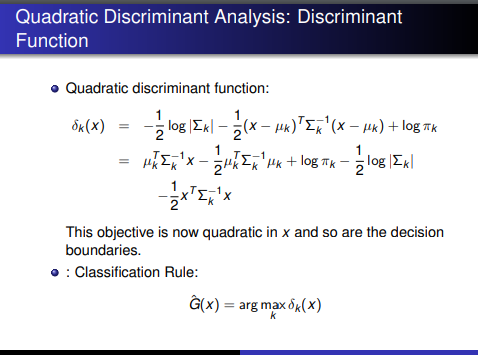



```
let delta[x] = a*X + b - 0.5 * X' * c * X 
from above formula

```





In [66]:
# Using Kfold
dataf7 = np.array(isdata)
q_fscore_kf = []
q_accuracy_kf = []
for kk in range(10):
  data_len = int(len(dataf7)/10)
  training = np.concatenate((dataf7[:kk*data_len],dataf7[(kk+1)*data_len:]))
  testing = dataf7[kk*data_len:(kk+1)*data_len]
  x = dict(collections.Counter(training[:,-1]))
  pi = np.zeros(len(x))
  for i in range(len(pi)):
    pi[i] = x[i]
  pi = pi / sum(x.values())
  u = np.zeros((len(x),len(training[0][:-1])))
  for i in range(len(training)):
    y = int(training[i][-1])
    X = training[i][:-1]
    u[y] += X/x[y]
  E = np.zeros(  ( len(x), len(u[0]), len(u[0]) )  )
  for i in range(len(training)):
    y = int(training[i][-1])
    X = training[i][:-1]
    E[y] += ((X-u[y]).reshape(-1,1) * (X-u[y])) / x[y]
  A = np.zeros(
      (len(x) , 1 , len(u[0]) )
  )

  b = np.zeros(len(x))
  c = np.zeros(
        (len(x) , len(u[0]) , len(u[0]) )
  )

  for i in range(len(A)):
    c[i] = np.linalg.inv(E[i])
    A[i] = np.matmul( u[i] , c[i] ) 
    b[i] = -0.5 * np.matmul( np.matmul(u[i],c[i]) , u[i].reshape(-1,1)) + np.log(pi[i]) - 0.5*np.log(np.linalg.det(E[i]))
  
  cm = np.zeros((len(x),len(x)))
  for i in range(len(testing)):
    y = int(testing[i][-1])
    X = testing[i][:-1]
    delta = np.zeros(len(x))
    for i in range(len(delta)):
      delta[i] = np.matmul(A[i],X.reshape(-1,1)) + b[i] - 0.5*np.matmul( np.matmul(X,c[i]), X.reshape(-1,1))
    cls = np.argmax(delta)
    cm[cls][y] += 1
  precision = cm[0][0] / sum(cm[0])
  recall = cm[0][0] / sum(cm[:,0])
  f_score = (2*precision*recall)/(precision+recall)
  q_fscore_kf.append(f_score)
  q_accuracy_kf.append((cm[0][0]+cm[1][1])/(len(testing)))
print(q_fscore_kf)
print(q_accuracy_kf)

[0.8888888888888888, 0.878048780487805, 0.9189189189189189, 0.8717948717948718, 0.75, 0.8648648648648648, 0.8648648648648649, 0.888888888888889, nan, nan]
[0.8857142857142857, 0.8571428571428571, 0.9142857142857143, 0.8571428571428571, 0.7714285714285715, 0.8571428571428571, 0.8571428571428571, 0.9714285714285714, 0.9428571428571428, 0.8857142857142857]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in double_scalars


In [67]:
# MER - Mean Error Rate
Q_MER_RS = 1-np.array(q_accuracy_rs)
Q_MER_KF = 1-np.array(q_accuracy_kf) 

print(Q_MER_RS)
print(Q_MER_KF)

[0.14166667 0.14166667 0.14166667 0.15       0.15       0.10833333
 0.15       0.13333333 0.08333333 0.1       ]
[0.11428571 0.14285714 0.08571429 0.14285714 0.22857143 0.14285714
 0.14285714 0.02857143 0.05714286 0.11428571]


In [68]:
# AMER - Average Mean Error Rate
Q_AMER_RS = np.sum(Q_MER_RS)/10
Q_AMER_KF = np.sum(Q_MER_KF)/10
print(Q_AMER_RS)
print(Q_AMER_KF)

0.13000000000000003
0.12000000000000004


**Naive Bayes**

In [69]:
# Using Hold out ( Random sampling)
dataf7 = np.array(isdata)
n_fscore_rs = []
n_accuracy_rs = []
for o in range(10):

  np.random.shuffle(dataf7)
  training = dataf7[:int(0.66*len(dataf7))]
  testing = dataf7[int(0.66*len(dataf7)):]

  x = dict(collections.Counter(training[:,-1]))

  pi = np.zeros(len(x))
  for i in range(len(pi)):
    pi[i] = x[i]
  pi = pi / sum(x.values())

  u = np.zeros((len(x),len(training[0][:-1])))
  for i in range(len(training)):
    y = int(training[i][-1])
    X = training[i][:-1]
    u[y] += X/x[y]

  d = {}
  d[1] = np.array([ i[:-1]  for i in training if i[-1]==1])
  d[0] = np.array([ i[:-1]  for i in training if i[-1]==0])
  sigma = np.zeros((len(x),len(training[0])-1))

  for i in range(len(sigma)):
    for j in range(len(sigma[0])):
      sigma[i][j] = np.std(d[i][:,j])

  cm = np.zeros((len(x),len(x)))
  for i in range(len(testing)):
    X = testing[i][:-1]
    y = int(testing[i][-1])

    Px0 = np.exp(
        -np.power(X-u[0],2) / (2*np.power(sigma[0],2))
    ) / (np.sqrt(2*np.pi*np.power(sigma[0],2))) 

    Px1 = np.exp(
        -np.power(X-u[1],2) / (2*np.power(sigma[1],2))
    ) / (np.sqrt(2*np.pi*np.power(sigma[1],2))) 

    p1 = pi[1]*np.prod(Px1)
    p0 = pi[0]*np.prod(Px0)
    
    if p1 >= p0 :
      cls = 1
    else:
      cls = 0
    cm[cls][y] += 1

  precision = cm[0][0] / sum(cm[0])
  recall = cm[0][0] / sum(cm[:,0])
  f_score = (2*precision*recall)/(precision+recall)
  n_fscore_rs.append(f_score)
  n_accuracy_rs.append((cm[0][0]+cm[1][1])/(len(testing)))
print(n_fscore_rs)
print(n_accuracy_rs)

[0.7307692307692306, 0.7184466019417476, 0.7045454545454546, 0.853932584269663, 0.823529411764706, 0.8125, 0.7741935483870966, 0.7083333333333334, 0.7272727272727272, 0.6938775510204082]
[0.7666666666666667, 0.7583333333333333, 0.7833333333333333, 0.8916666666666667, 0.875, 0.85, 0.825, 0.7666666666666667, 0.8, 0.75]


In [70]:
# Using K fold
dataf7 = np.array(isdata)
n_fscore_kf = []
n_accuracy_kf = []
for kk in range(10):
  data_len = int(len(dataf7)/10)
  training = np.concatenate((dataf7[:kk*data_len],dataf7[(kk+1)*data_len:]))
  testing = dataf7[kk*data_len:(kk+1)*data_len]

  x = dict(collections.Counter(training[:,-1]))

  pi = np.zeros(len(x))
  for i in range(len(pi)):
    pi[i] = x[i]
  pi = pi / sum(x.values())

  u = np.zeros((len(x),len(training[0][:-1])))
  for i in range(len(training)):
    y = int(training[i][-1])
    X = training[i][:-1]
    u[y] += X/x[y]

  d = {}
  d[1] = np.array([ i[:-1]  for i in training if i[-1]==1])
  d[0] = np.array([ i[:-1]  for i in training if i[-1]==0])
  sigma = np.zeros((len(x),len(training[0])-1))

  for i in range(len(sigma)):
    for j in range(len(sigma[0])):
      sigma[i][j] = np.std(d[i][:,j])

  cm = np.zeros((len(x),len(x)))
  for i in range(len(testing)):
    X = testing[i][:-1]
    y = int(testing[i][-1])

    Px0 = np.exp(
        -np.power(X-u[0],2) / (2*np.power(sigma[0],2))
    ) / (np.sqrt(2*np.pi*np.power(sigma[0],2))) 

    Px1 = np.exp(
        -np.power(X-u[1],2) / (2*np.power(sigma[1],2))
    ) / (np.sqrt(2*np.pi*np.power(sigma[1],2))) 

    p1 = pi[1]*np.prod(Px1)
    p0 = pi[0]*np.prod(Px0)
    
    if p1 >= p0 :
      cls = 1
    else:
      cls = 0
    cm[cls][y] += 1

  precision = cm[0][0] / sum(cm[0])
  recall = cm[0][0] / sum(cm[:,0])
  f_score = (2*precision*recall)/(precision+recall)
  n_fscore_kf.append(f_score)
  n_accuracy_kf.append((cm[0][0]+cm[1][1])/(len(testing)))
print(n_fscore_kf)
print(n_accuracy_kf)

[0.8333333333333333, 0.8888888888888888, 0.8235294117647058, 0.7428571428571428, 0.8108108108108109, 0.9189189189189189, 0.8333333333333334, 0.5, nan, nan]
[0.8285714285714286, 0.8857142857142857, 0.8285714285714286, 0.7428571428571429, 0.8, 0.9142857142857143, 0.8285714285714286, 0.7714285714285715, 0.5142857142857142, 0.7142857142857143]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in double_scalars


In [71]:
# MER - Mean Error Rate
N_MER_RS = 1-np.array(n_accuracy_rs)
N_MER_KF = 1-np.array(n_accuracy_kf) 

print(N_MER_RS)
print(N_MER_KF)

[0.23333333 0.24166667 0.21666667 0.10833333 0.125      0.15
 0.175      0.23333333 0.2        0.25      ]
[0.17142857 0.11428571 0.17142857 0.25714286 0.2        0.08571429
 0.17142857 0.22857143 0.48571429 0.28571429]


In [72]:
# AMER - Average Mean Error Rate
N_AMER_RS = np.sum(N_MER_RS)/10
N_AMER_KF = np.sum(N_MER_KF)/10
print(N_AMER_RS)
print(N_AMER_KF)

0.19333333333333333
0.21714285714285714


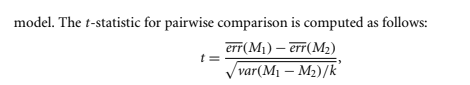

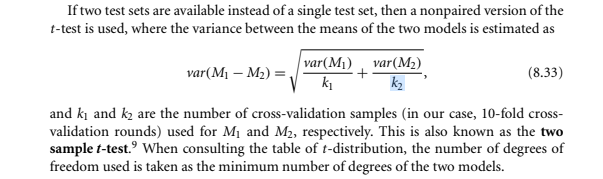

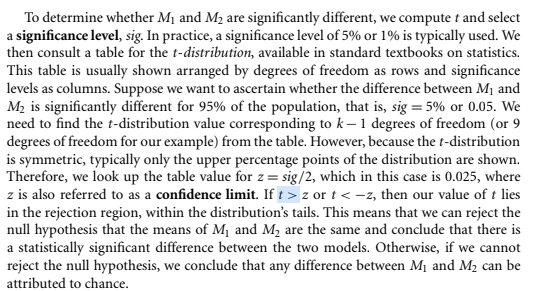

In [73]:
# T Test Using Random Sampling Method

var = np.sqrt(  np.var(Q_MER_RS)/10  + np.var(N_MER_RS)/10  )
t = (Q_AMER_RS - N_AMER_RS) / np.sqrt(var/10)

print(t)

-1.539921793289753


In [74]:
# T Test Using K Fold

var = np.sqrt(  np.var(Q_MER_KF)/10  + np.var(N_MER_KF)/10  )
t = (Q_AMER_KF - N_AMER_KF) / np.sqrt(var/10)

print(t)

-1.5869483172090786


# 17. Apply multiclass QDA and multiclass Naive Bayes on Abalone Data Set.

(a) Explain the experimental procedure.

(b) Report the values of the parameters.

(c) Compare the performance of the algorithms by applying statistical measures (t
test).

(d) Write report on the results obtained.

In [141]:
adata = pd.read_csv("/content/drive/MyDrive/DM_Asgmt_04/abalone.csv",header=None)
adata

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [142]:
# Male - 3
# Female - 1
# Infant - 2
adata[0] = adata[0].replace('M',3)
adata[0] = adata[0].replace('F',1)
adata[0] = adata[0].replace('I',2)
adata

,0,1,2,3,4,5,6,7,8
0,3,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,3,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,1,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,3,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,3,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,1,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [143]:
adata = adata.rename(columns={8:"y"})

In [145]:
counts = dict(adata["y"].value_counts())
index = []
for i in counts.keys():
  if counts[i] < 100:
    index.append(i)
index

[16, 17, 4, 18, 19, 20, 3, 21, 23, 22, 24, 27, 1, 25, 2, 26, 29]

In [146]:
adata = adata[adata.y > 4]
adata = adata[adata.y < 16]

In [147]:
countss = dict(adata["y"].value_counts())

In [148]:
countss

{5: 115,
 6: 259,
 7: 391,
 8: 568,
 9: 689,
 10: 634,
 11: 487,
 12: 267,
 13: 203,
 14: 126,
 15: 103}

In [149]:
sorted(countss.keys())

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [150]:
adata["y"] = (adata["y"] - 5)

In [151]:
adata

,0,1,2,3,4,5,6,7,y
0,3,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,10
1,3,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,2
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,4
3,3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,5
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,2
...,...,...,...,...,...,...,...,...,...
4172,1,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,6
4173,3,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,5
4174,3,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,4
4175,1,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,5


In [154]:
# Using Hold out ( Random sampling)
dataf8 = np.array(adata)
q_accuracy_rs = []
for o in range(10):
  np.random.shuffle(dataf8)
  training = dataf8[:int(0.8*len(dataf8))]
  testing = dataf8[int(0.8*len(dataf8)):]
  x = dict(collections.Counter(training[:,-1]))
  xx = len(x)
  pi = np.zeros(xx)
  for i in range(len(pi)):
    pi[i] = x[i]
  pi = pi / sum(x.values())
  u = np.zeros((xx,len(training[0][:-1])))
  for i in range(len(training)):
    y = int(training[i][-1])
    X = training[i][:-1]
    u[y] += X/x[y]
  E = np.zeros(  ( xx, len(u[0]), len(u[0]) )  )
  for i in range(len(training)):
    y = int(training[i][-1])
    X = training[i][:-1]
    E[y] += ((X-u[y]).reshape(-1,1) * (X-u[y])) / x[y]
  A = np.zeros(
      (xx , 1 , len(u[0]) )
  )

  b = np.zeros(xx)
  c = np.zeros(
        (xx , len(u[0]) , len(u[0]) )
  )

  for i in range(len(A)):
    try:
      c[i] = np.linalg.inv(E[i])
    except:
      print("Exception")
      print(E[i])
      print(i)
      print(x[i])
      input()
    A[i] = np.matmul( u[i] , c[i] ) 
    b[i] = -0.5 * np.matmul( np.matmul(u[i],c[i]) , u[i].reshape(-1,1)) + np.log(pi[i]) - 0.5*np.log(np.linalg.det(E[i]))
    # print(b[i])
  
  cm = np.zeros((xx,xx))
  for i in range(len(testing)):
    y = int(testing[i][-1])
    X = testing[i][:-1]
    delta = np.zeros(xx)
    for i in range(len(delta)):
      delta[i] = np.matmul(A[i],X.reshape(-1,1)) + b[i] - 0.5*np.matmul( np.matmul(X,c[i]), X.reshape(-1,1))
    cls = np.argmax(delta)
    # print(delta)
    
    cm[cls][y] += 1
  accuracy = 0
  for i in range(len(cm)):
    accuracy += cm[i][i]
  accuracy /= len(testing)
  q_accuracy_rs.append(accuracy)
  # print(cm)

print(q_accuracy_rs)

[0.25227568270481143, 0.2340702210663199, 0.2665799739921977, 0.2574772431729519, 0.24057217165149544, 0.25487646293888166, 0.2444733420026008, 0.247074122236671, 0.2535760728218466, 0.22366710013003901]


In [155]:
cm

array([[17., 24., 20.,  0.,  2.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 3.,  3.,  5.,  6.,  3.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 2., 24., 45., 53., 26., 14., 10.,  7.,  2.,  1.,  0.],
       [ 0.,  0.,  2.,  6.,  8.,  3.,  4.,  2.,  2.,  1.,  1.],
       [ 0.,  1.,  9., 49., 58., 49., 41., 18., 10., 10., 10.],
       [ 0.,  1.,  4.,  5., 15., 24., 17.,  9., 16., 10.,  2.],
       [ 0.,  0.,  1.,  5.,  6., 18., 13.,  7.,  7.,  3.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  2.,  7.,  2.,  1.,  2.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  4.,  5.,  5.,  1.,  2.,  2.],
       [ 0.,  0.,  0.,  0.,  0.,  2.,  0.,  1.,  3.,  1.,  1.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  3.,  3.,  2.]])

In [156]:


precision = np.zeros(len(cm))
recall = np.zeros(len(cm))
f_score = np.zeros(len(cm))

for i in range(1,len(precision)):
  precision[i] = cm[i][i]/(sum(cm[i]))
  recall[i] = cm[i][i]/(sum(cm[:,i]))
  f_score[i] = (2*precision[i]*recall[i])/(precision[i]+recall[i])

In [157]:
fscore = {k:v for k,v in enumerate(f_score)}
del(fscore[0])
print("F Scores of each class are")
for k,v in fscore.items():
  print(f"Class {k} : F-score {v}")


F Scores of each class are
Class 1 : F-score 0.0810810810810811
Class 2 : F-score 0.3333333333333333
Class 3 : F-score 0.07843137254901962
Class 4 : F-score 0.31016042780748665
Class 5 : F-score 0.21917808219178084
Class 6 : F-score 0.16149068322981364
Class 7 : F-score 0.060606060606060615
Class 8 : F-score 0.03125
Class 9 : F-score 0.04878048780487805
Class 10 : F-score 0.13333333333333333


In [167]:
# MER - Mean Error Rate
Q_MER_RS = 1-np.array(q_accuracy_rs)

print(Q_MER_RS)


[0.74772432 0.76592978 0.73342003 0.74252276 0.75942783 0.74512354
 0.75552666 0.75292588 0.74642393 0.7763329 ]


In [168]:
# AMER - Average Mean Error Rate
Q_AMER_RS = np.sum(Q_MER_RS)/10
print(Q_AMER_RS)

0.7525357607282184


**Naive Bayes**

In [163]:
# Using Hold out ( Random sampling)
dataf8 = np.array(adata)

n_accuracy_rs = []
for o in range(10):

  np.random.shuffle(dataf8)
  training = dataf8[:int(0.8*len(dataf8))]
  testing = dataf8[int(0.8*len(dataf8)):]

  x = dict(collections.Counter(training[:,-1]))
  xx = len(x)
  pi = np.zeros(xx)
  for i in range(len(pi)):
    pi[i] = x[i]
  pi = pi / sum(x.values())

  u = np.zeros((xx,len(training[0][:-1])))
  for i in range(len(training)):
    y = int(training[i][-1])
    X = training[i][:-1]
    u[y] += X/x[y]

  d = {}
  for j in range(xx):
    d[j] = np.array([ i[:-1]  for i in training if i[-1]==j])
  sigma = np.zeros((xx,len(training[0])-1))

  for i in range(len(sigma)):
    for j in range(len(sigma[0])):
      sigma[i][j] = np.std(d[i][:,j])

  cm = np.zeros((xx,xx))
  for i in range(len(testing)):
    X = testing[i][:-1]
    y = int(testing[i][-1])
    Px = {}
    for k in range(xx):
      Px[k] = np.exp(
          -np.power(X-u[k],2) / (2*np.power(sigma[k],2))
      ) / (np.sqrt(2*np.pi*np.power(sigma[k],2))) 
    p = np.zeros(xx)
    for k in range(xx):
      p[k] = pi[k]*np.prod(Px[k])
    cls = np.argmax(p)
    cm[cls][y] += 1

  accuracy = 0
  for i in range(len(cm)):
    accuracy += cm[i][i]
  accuracy /= len(testing)
  n_accuracy_rs.append(accuracy)
print(n_accuracy_rs)

[0.2886866059817945, 0.27698309492847856, 0.27698309492847856, 0.24577373211963588, 0.26918075422626786, 0.258777633289987, 0.247074122236671, 0.24967490247074123, 0.26397919375812745, 0.26527958387516254]


In [164]:
cm

array([[11., 26., 14.,  3.,  4.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 2., 20., 24., 12., 10.,  5.,  3.,  0.,  1.,  0.,  0.],
       [ 0., 13., 19., 25., 10., 10.,  5.,  2.,  3.,  0.,  1.],
       [ 0.,  2., 12., 34., 28., 21., 12., 12.,  7.,  5.,  5.],
       [ 0.,  0.,  4., 24., 46., 38., 17.,  9., 10.,  5.,  3.],
       [ 0.,  0.,  0.,  7., 16., 25.,  4.,  6.,  8.,  5.,  5.],
       [ 0.,  1.,  2.,  5., 26., 38., 48., 22., 11.,  8., 10.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [165]:


precision = np.zeros(len(cm))
recall = np.zeros(len(cm))
f_score = np.zeros(len(cm))

for i in range(1,len(precision)):
  precision[i] = cm[i][i]/(sum(cm[i]))
  recall[i] = cm[i][i]/(sum(cm[:,i]))
  f_score[i] = (2*precision[i]*recall[i])/(precision[i]+recall[i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


In [166]:
fscore = {k:v for k,v in enumerate(f_score)}
del(fscore[0])
print("F Scores of each class are")
for k,v in fscore.items():
  print(f"Class {k} : F-score {v}")


F Scores of each class are
Class 1 : F-score 0.28776978417266186
Class 2 : F-score 0.23312883435582823
Class 3 : F-score 0.2741935483870968
Class 4 : F-score 0.30976430976430974
Class 5 : F-score 0.2336448598130841
Class 6 : F-score 0.367816091954023
Class 7 : F-score 0.03571428571428572
Class 8 : F-score nan
Class 9 : F-score nan
Class 10 : F-score nan


In [169]:
# MER - Mean Error Rate
N_MER_RS = 1-np.array(n_accuracy_rs) 

print(N_MER_RS)

[0.71131339 0.72301691 0.72301691 0.75422627 0.73081925 0.74122237
 0.75292588 0.7503251  0.73602081 0.73472042]


In [170]:
# AMER - Average Mean Error Rate
N_AMER_RS = np.sum(N_MER_RS)/10
print(N_AMER_RS)


0.7357607282184656


In [171]:
# T Test Using Random Sampling Method

var = np.sqrt(  np.var(Q_MER_RS)/10  + np.var(N_MER_RS)/10  )
t = (Q_AMER_RS - N_AMER_RS) / np.sqrt(var/10)

print(t)

0.7048060948400489


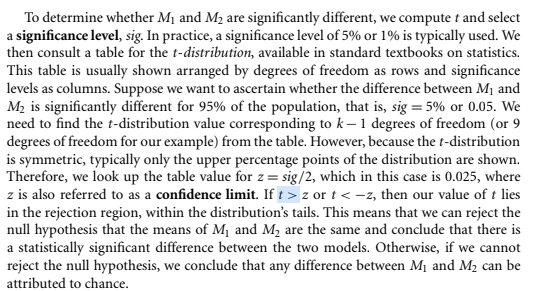



```
t = 0.7048
z = 0.025 

And t > z, thus, the two models ( Naive Bayes and QDA ) are statistically different.
```

